<a href="https://colab.research.google.com/github/Lannn21/AFL2_Datamining/blob/main/AFL2_Daatamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AFL 2 Data Mining - Covid Dataset**

# Maulana - Daniel

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
!pip install kneed
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hie

In [ ]:
url = "https://raw.githubusercontent.com/Lannn21/AFL2_Datamining/refs/heads/main/COVID-19%20Coronavirus.csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [ ]:
df.isnull().sum()

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [ ]:
df.drop(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE'], axis=1, inplace=True)
df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
df = df.rename(columns={df.columns[4]: "Tot Cases per 1M pop",
                        df.columns[5]: "Tot Deaths per 1M pop"})
df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases per 1M pop,0
Tot Deaths per 1M pop,0
Death percentage,0


# **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


<ipython-input-9-34c6f0ecb1ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_cases, x="Continent", y="Total Cases", palette="coolwarm")


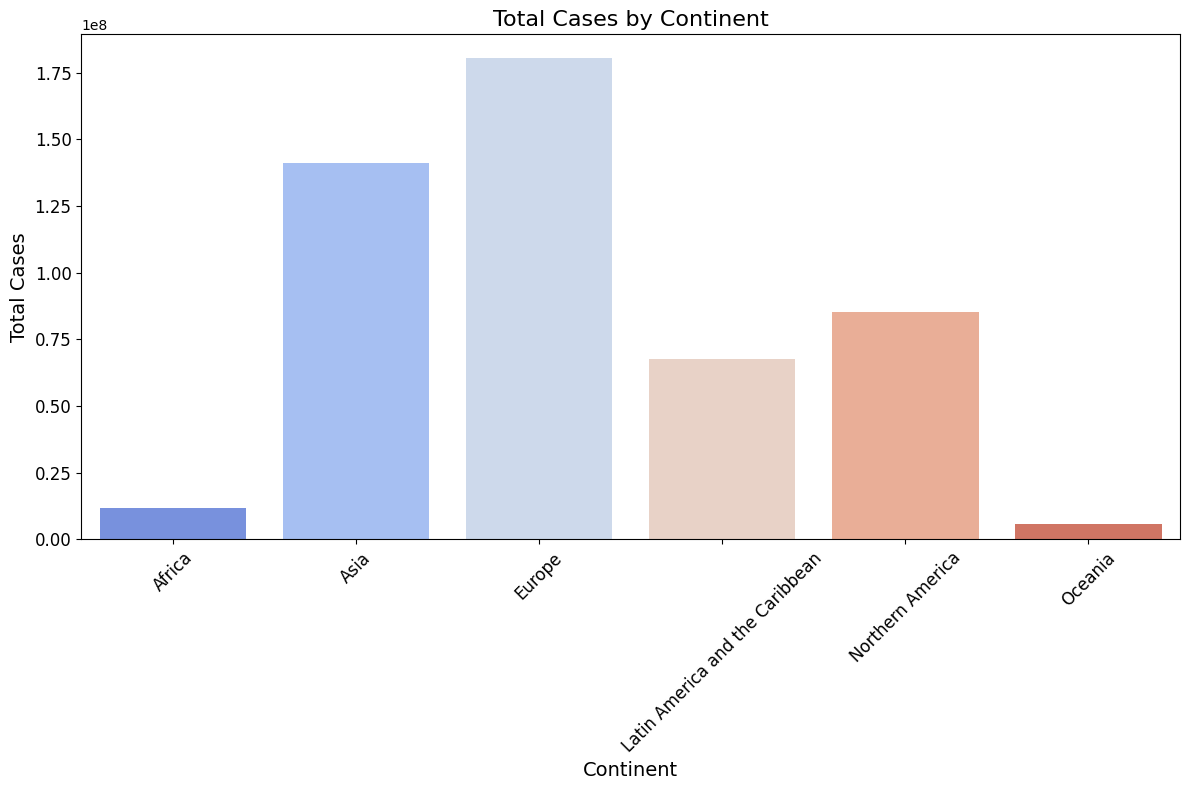

In [ ]:
# Grupkan data berdasarkan benua dan jumlahkan total kasus
continent_cases = df.groupby("Continent")["Total Cases"].sum().reset_index()

# Visualisasi bar plot total kasus menurut benua
plt.figure(figsize=(12, 8))
sns.barplot(data=continent_cases, x="Continent", y="Total Cases", palette="coolwarm")
plt.title("Total Cases by Continent", fontsize=16)
plt.xlabel("Continent", fontsize=14)
plt.ylabel("Total Cases", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-10-365db710e86f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_cases, x="Continent", y="Total Deaths", palette="coolwarm")


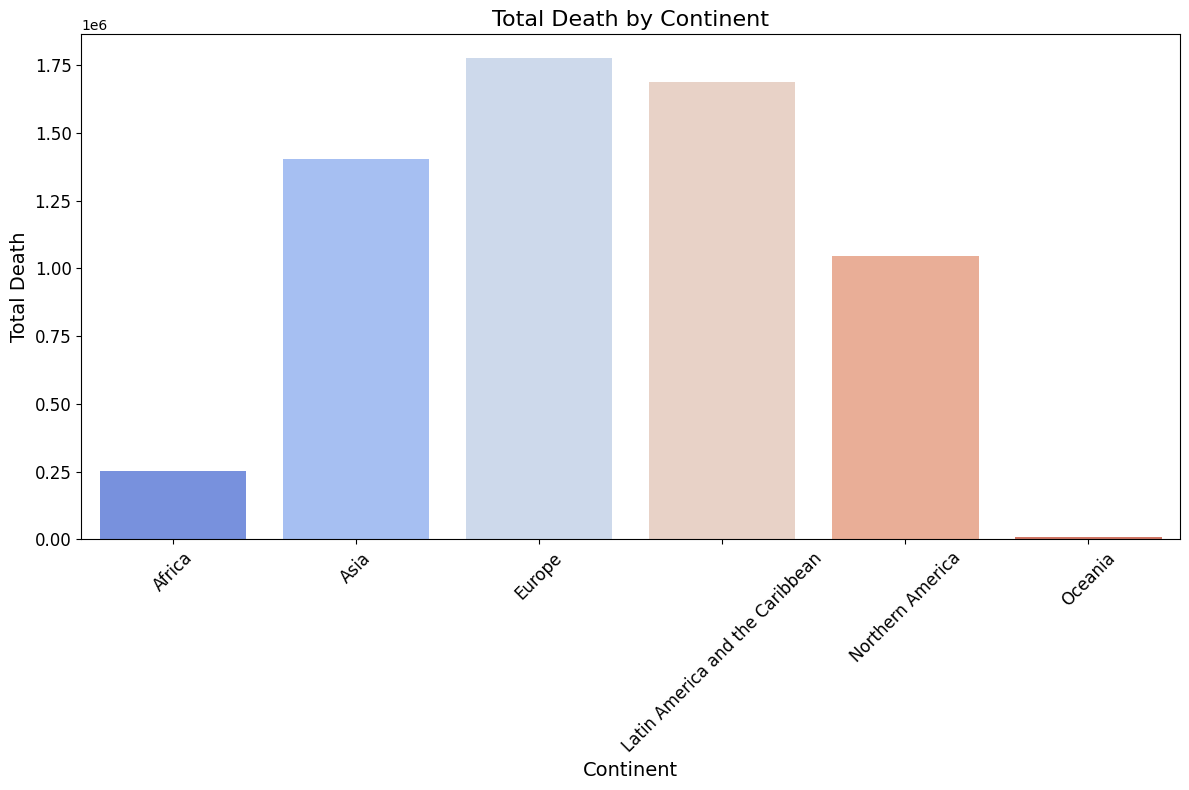

In [ ]:
# Grupkan data berdasarkan benua dan jumlahkan total kematian
continent_cases = df.groupby("Continent")["Total Deaths"].sum().reset_index()

# Visualisasi bar plot total kematian menurut benua
plt.figure(figsize=(12, 8))
sns.barplot(data=continent_cases, x="Continent", y="Total Deaths", palette="coolwarm")
plt.title("Total Death by Continent", fontsize=16)
plt.xlabel("Continent", fontsize=14)
plt.ylabel("Total Death", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

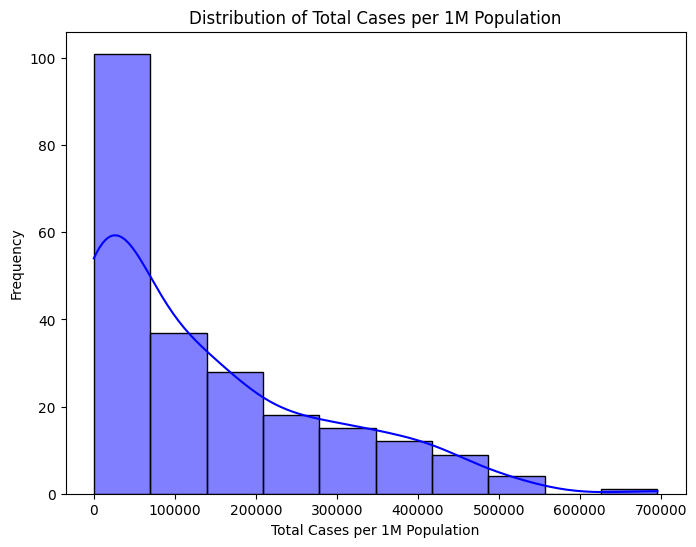

In [ ]:
# Histogram distribusi kasus per 1 juta penduduk
plt.figure(figsize=(8, 6))
sns.histplot(df["Tot Cases per 1M pop"], bins=10, kde=True, color='blue')
plt.title("Distribution of Total Cases per 1M Population")
plt.xlabel("Total Cases per 1M Population")
plt.ylabel("Frequency")
plt.show()


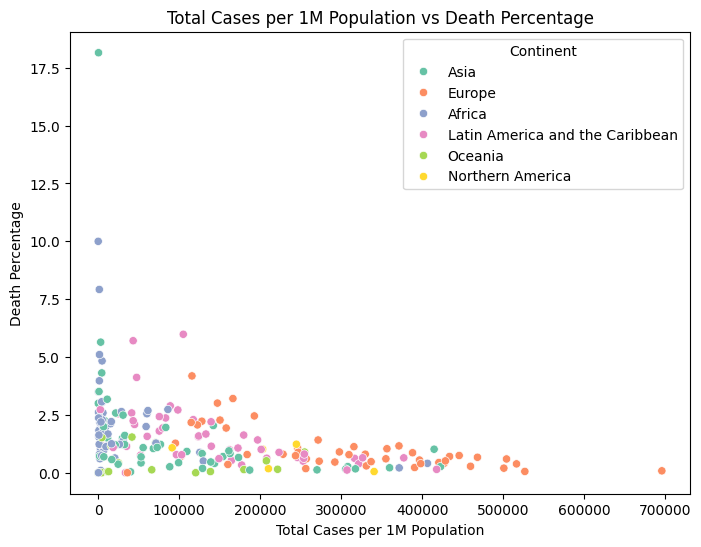

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=	"Tot Cases per 1M pop", y="Death percentage", hue="Continent", palette="Set2")
plt.title("Total Cases per 1M Population vs Death Percentage")
plt.xlabel("Total Cases per 1M Population")
plt.ylabel("Death Percentage")
plt.legend(title="Continent")
plt.show()


# **Data Preparation and Transformation**

In [ ]:
le = LabelEncoder()
df['Continent'] = le.fit_transform(df['Continent'])
df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


In [ ]:
df['Death percentage'] = df['Death percentage'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Population             225 non-null    int64
 1   Continent              225 non-null    int64
 2   Total Cases            225 non-null    int64
 3   Total Deaths           225 non-null    int64
 4   Tot Cases per 1M pop   225 non-null    int64
 5   Tot Deaths per 1M pop  225 non-null    int64
 6   Death percentage       225 non-null    int64
dtypes: int64(7)
memory usage: 12.4 KB


In [ ]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=['Population', 'Continent','Total Cases', 'Total Deaths', 'Tot Cases per 1M pop',
                                                  'Tot Death per 1M pop', 'Death percentage'])
df_scaled.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Death per 1M pop,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.718056
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.005106
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.569282
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.579493
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,-0.005106


# **Clustering**
### K-Means

In [ ]:
sse=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

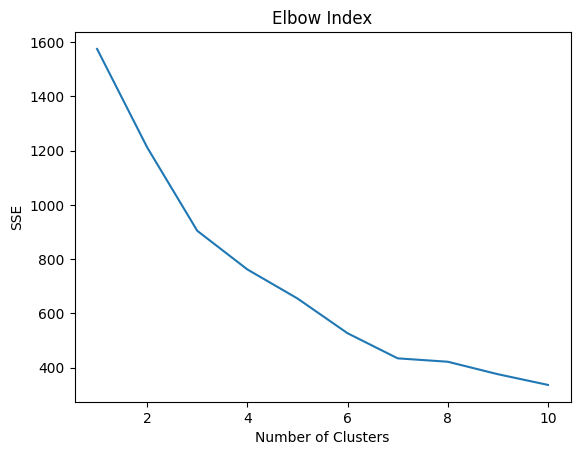

In [ ]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")
plt.show()

In [ ]:
findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

the best k for your model is  4


In [ ]:
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

In [ ]:
y_pred

array([0, 3, 0, 1, 0, 3, 3, 1, 1, 1, 3, 1, 0, 3, 1, 0, 3, 3, 1, 3, 0, 3,
       0, 3, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 1, 1, 0, 1,
       0, 0, 3, 3, 1, 3, 1, 1, 1, 1, 0, 3, 3, 0, 3, 0, 3, 0, 0, 1, 0, 0,
       1, 3, 3, 3, 1, 3, 3, 0, 0, 1, 1, 0, 1, 1, 3, 3, 1, 3, 0, 0, 3, 3,
       3, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 1, 3,
       1, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0, 3, 1, 3, 0, 0, 3,
       0, 3, 3, 3, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 3, 3, 1, 3, 3, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 3, 0, 3, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 3, 0, 0, 1, 1, 1, 2, 0, 3, 3, 3, 0,
       3, 0, 0, 0, 0], dtype=int32)

In [ ]:
print(df_scaled.columns)

Index(['Population', 'Continent', 'Total Cases', 'Total Deaths',
       'Tot Cases per 1M pop', 'Tot Death per 1M pop', 'Death percentage'],
      dtype='object')


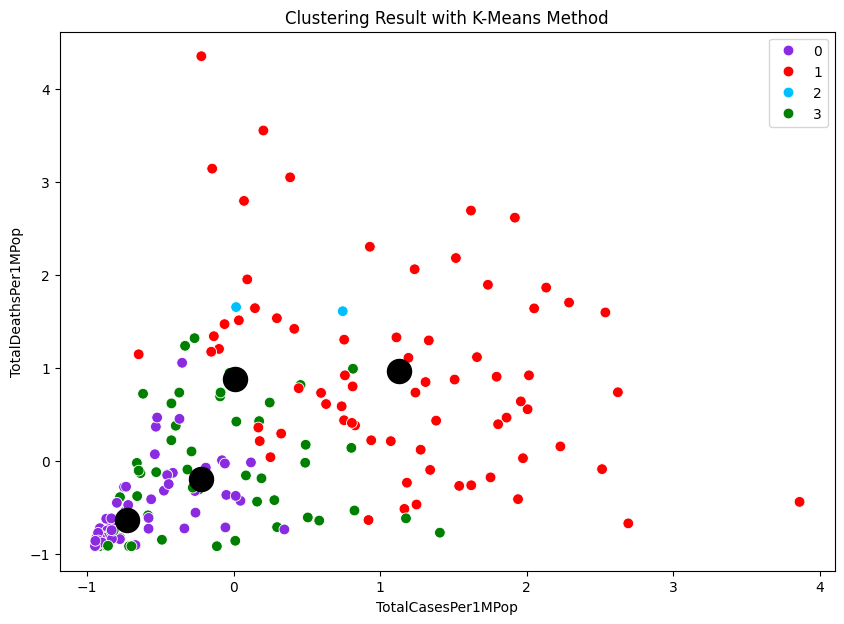

In [ ]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Tot Cases per 1M pop", y = "Tot Death per 1M pop", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "green"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("TotalCasesPer1MPop")
plt.ylabel("TotalDeathsPer1MPop")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [ ]:
df_inverse = pd.DataFrame(sc.inverse_transform(df_scaled), columns=['Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases per 1M pop', 'Tot Deaths per 1M pop', 'Death percentage'])
# Add the cluster labels to the original data
df_inverse['Kmeans'] = y_pred
# Analyze the clusters with the original values
df_inverse.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage,Kmeans
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.0,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.0,3
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.0,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.0,1
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.0,0


In [ ]:
kmeans_summary = df_inverse.groupby('Kmeans').agg({
    'Tot Cases per 1M pop': ['mean', 'std', 'min', 'max'],
    'Tot Deaths per 1M pop': ['mean', 'std', 'min', 'max'],
    'Death percentage': ['mean', 'std', 'min', 'max'],
    'Population': ['mean', 'std', 'min', 'max'],
    'Continent': [pd.Series.mode,'mean', 'std', 'min', 'max'],
    'Total Cases': ['mean', 'std', 'min', 'max'],
    'Total Deaths': ['mean', 'std', 'min', 'max']
})

kmeans_summary

Tot Cases per 1M pop                                    \
                       mean            std      min       max   
Kmeans                                                          
0              31716.924731   43942.574040     16.0  187113.0   
1             300627.760563  126393.446689  43147.0  696044.0   
2             138262.666667  107045.039550  30653.0  244734.0   
3             105061.224138   84157.233797      9.0  340703.0   

       Tot Deaths per 1M pop                             Death percentage  \
                        mean          std    min     max             mean   
Kmeans                                                                      
0                 330.021505   440.860127    0.0  2353.0         1.494624   
1                2246.056338  1247.911855  293.0  6286.0         0.619718   
2                2151.333333  1542.041612  371.0  3068.0         1.333333   
3                 864.568966   768.853170    0.0  2669.0         0.689655   

                  ...     Continent        Total Cases                \
             std  ...           min  max          mean           std   
Kmeans            ...                                                  
0       2.343463  ...  2.220446e-16  1.0  7.574150e+05  1.678050e+06   
1       1.163323  ...  2.220446e-16  3.0  3.452823e+06  5.707063e+06   
2       0.577350  ...  1.000000e+00  4.0  5.162264e+07  2.696691e+07   
3       0.862613  ...  2.000000e+00  5.0  3.641017e+05  8.031100e+05   

                                 Total Deaths                           \
               min         max           mean            std       min   
Kmeans                                                                   
0              2.0   9818328.0   10291.107527   25059.006269       0.0   
1           4150.0  25997852.0   39560.169014   72213.445567       6.0   
2       29999816.0  81839052.0  729959.666667  250787.614635  521388.0   
3              1.0   4680816.0    3794.913793    7848.875115       0.0   

                   
              max  
Kmeans             
0        155288.0  
1        369708.0  
2       1008222.0  
3         37690.0  

[4 rows x 29 columns]

In [ ]:
df_inverse.groupby(y_pred)['Kmeans'].agg(pd.Series.count)

,Kmeans
0,93
1,71
2,3
3,58


# **Hierarchical**

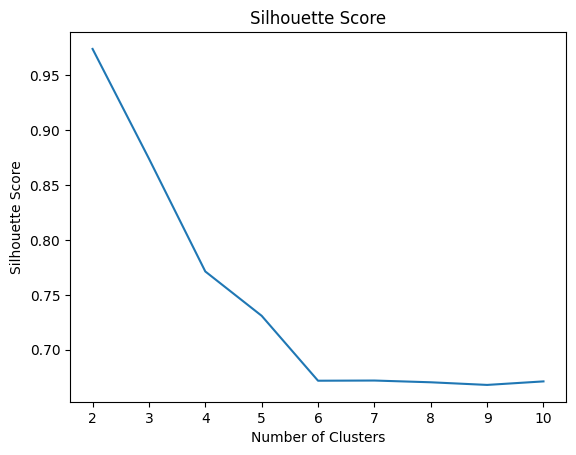

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_inverse, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_inverse, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

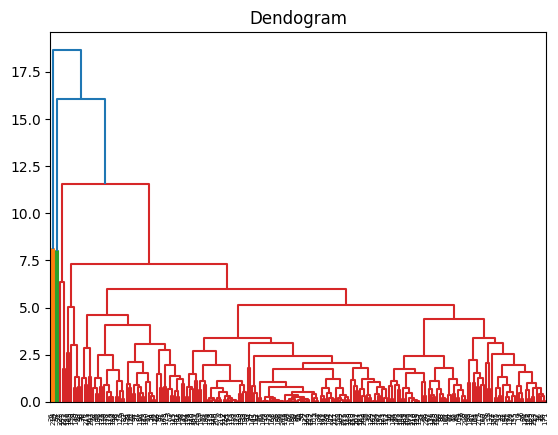

In [ ]:
dist_matrix = sch.linkage(df_scaled, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

In [ ]:
agglo = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
model2 = agglo.fit_predict(df_scaled)

df_inverse["agglo"] = model2

In [ ]:
agglo_summary = df_inverse.groupby('agglo').agg({
    'Tot Cases per 1M pop': ['mean', 'std', 'min', 'max'],
    'Tot Deaths per 1M pop': ['mean', 'std', 'min', 'max'],
    'Death percentage': ['mean', 'std', 'min', 'max'],
    'Population': ['mean', 'std', 'min', 'max'],
    'Continent': [pd.Series.mode,'mean', 'std', 'min', 'max'],
    'Total Cases': ['mean', 'std', 'min', 'max'],
    'Total Deaths': ['mean', 'std', 'min', 'max']
})

agglo_summary

Tot Cases per 1M pop                                    \
                      mean            std      min       max   
agglo                                                          
0             91831.666667  133295.130858    108.0  244734.0   
1            288910.042254  141629.433567  43147.0  696044.0   
2             33994.543478   47624.196812     16.0  187113.0   
3            116728.440678   85352.299946      9.0  256341.0   

      Tot Deaths per 1M pop                             Death percentage  \
                       mean          std    min     max             mean   
agglo                                                                      
0               1129.666667  1643.081658    3.0  3015.0         1.333333   
1               2264.464789  1283.422543  174.0  6286.0         0.859155   
2                322.554348   401.791958    0.0  1651.0         1.445652   
3                896.949153   725.810473    0.0  2277.0         0.491525   

                 ...     Continent        Total Cases                          \
            std  ...           min  max          mean           std       min   
agglo            ...                                                            
0      0.577350  ...  1.000000e+00  4.0  4.167428e+07  4.085901e+07  154738.0   
1      1.268247  ...  2.220446e-16  4.0  3.812113e+06  6.527672e+06    1957.0   
2      2.364407  ...  2.220446e-16  1.0  7.812352e+05  1.687663e+06       2.0   
3      0.653185  ...  2.000000e+00  5.0  4.071069e+05  8.669445e+05       1.0   

                    Total Deaths                                    
              max           mean            std     min        max  
agglo                                                               
0      81839052.0  511416.000000  501866.308744  4638.0  1008222.0  
1      29999816.0   49510.436620  102820.333517     1.0   660269.0  
2       9818328.0   10265.336957   25112.717472     0.0   155288.0  
3       4680816.0    3083.542373    6330.567985     0.0    37690.0  

[4 rows x 29 columns]

In [ ]:
df_inverse.groupby("agglo")["agglo"].agg(pd.Series.count)

,agglo
agglo,
0,3
1,71
2,92
3,59


# **Hirarchical Visualizatione**




##Single Linkage

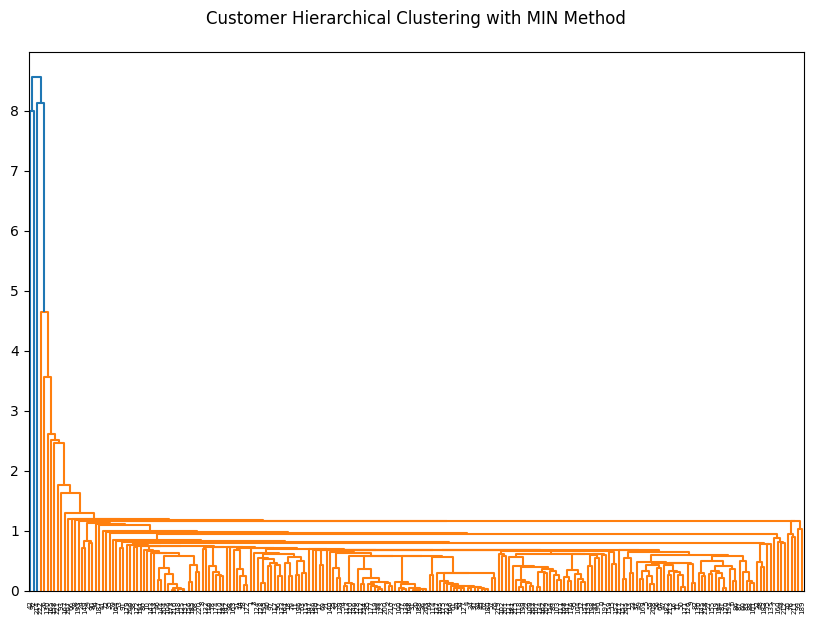

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df_scaled, method="single"))

##Complete Linkage

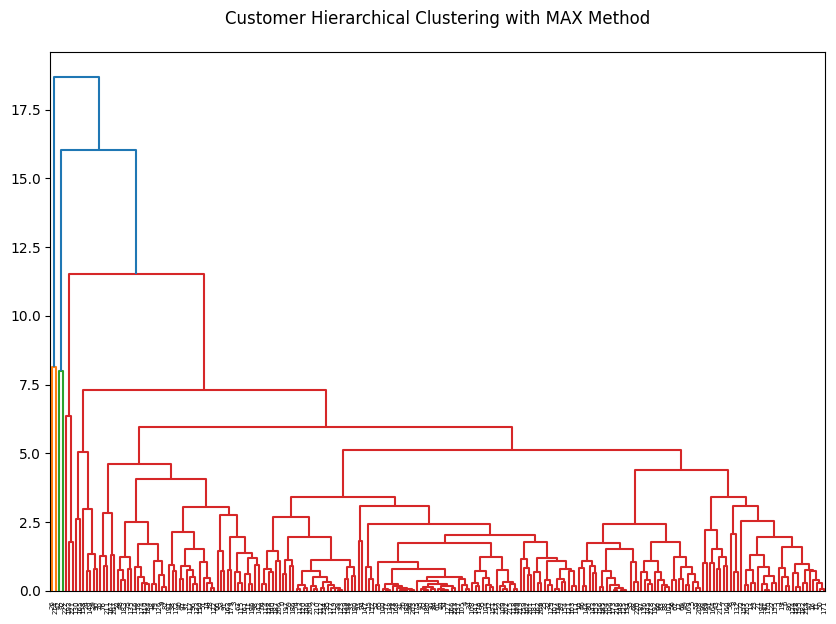

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MAX Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df_scaled, method="complete"))

##Average Linkage

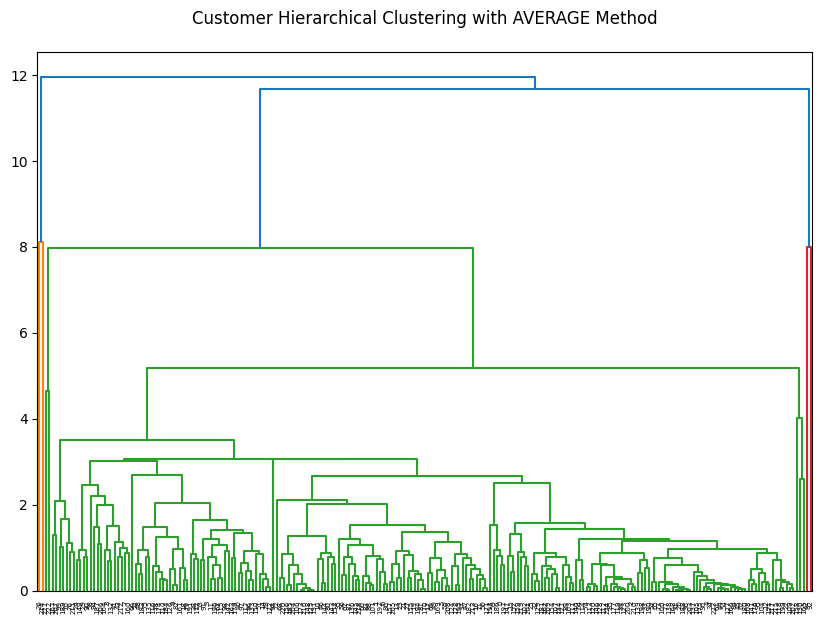

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with AVERAGE Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df_scaled, method="average"))

##Ward Linkage

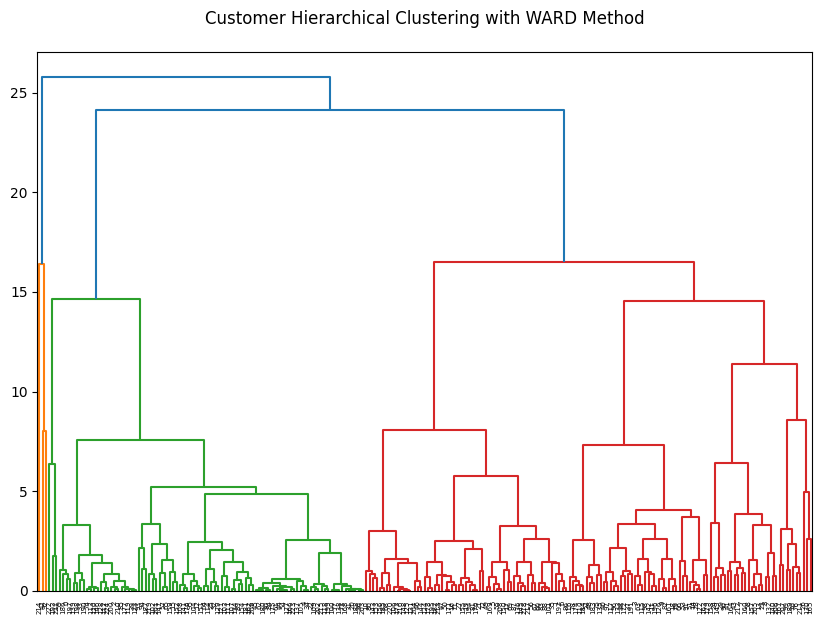

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with WARD Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df_scaled, method="ward"))